<font size = '6'><b>Control with Python</b></font>
<br><br>
<font size = '4'><b>(interactive widget)</b></font>

<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 50% style="border-style: hidden; border-collapse: collapse;">
             
        </td>
        <td width = 30%>
            Prof. Seungchul Lee<br>iSystems (http://isystems.unist.ac.kr/)<br>UNIST
        </td>
    </tr>
</table>


Table of Contents
<div id="toc"></div>

# 1. PID Control

- 1.5 Control Design Basics | Control of Mobile Robots

In [1]:
%%html
<iframe src="https://www.youtube.com/embed/DJuo9kLdr4M?list=PLp8ijpvp8iCvFDYdcXqqYU5Ibl_aOqwjr" 
width="560" height="315" frameborder="0" allowfullscreen></iframe>

For the given car model

$$ \dot{x} = \frac{c}{m}u \quad \text{for the velocity of a car,} \,\, x $$

In a bloack diagram

<img src="./image_files/car_model.png" width=300/>

in a Laplace transform
<img src="./image_files/car_model_Laplace.png" width=300/>

We want to achieve
$$ x \rightarrow r \quad \text{as} \quad t \rightarrow \infty \,\,(e=r-x \rightarrow 0) $$

## Attempt 2: P Regulator

$$
u = ke$$

- small error yeilds small control signals

- nice and smooth

- so-called proportional regulation (P regulator)

<img src="./image_files/car_model_Kp.png" width=400/>

In [2]:
import control
import numpy as np
import matplotlib.pyplot as plt
from control import *
from ipywidgets import *

%matplotlib inline

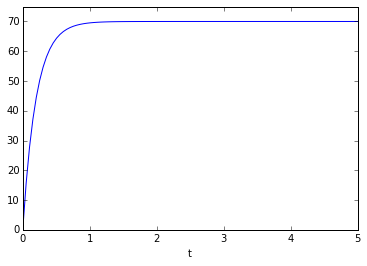

In [3]:
def pltshow(k):
    c = 1
    m = 1
    
    G = tf(c/m,[1,0])

    C = k

    Gcl = feedback(C*G,1,-1)

    t = np.linspace(0,5,100)
    r = 70*np.ones(t.shape)
    x0 = 0

    [y,tout,x] = lsim(Gcl,r,t,x0)

    plt.plot(tout,y)
    plt.xlabel('t')
    plt.ylim(0,75)

    plt.show()
    
interact(pltshow, k=(1.0,9.0))
plt.show()

## What if the true system is:

$$ 
\dot{x} = \frac{c}{m}u - \gamma x$$

<br>
<img src="./image_files/true_car_Kp.png" width=400/>

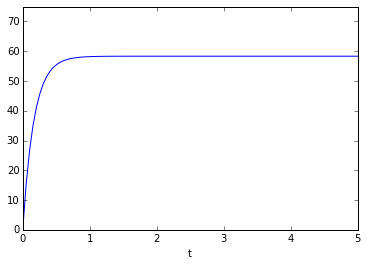

In [4]:
def pltshow(k):
    c = 1
    m = 1
    gamma = 1
    
    G = tf(c/m,[1,gamma])

    C = k

    Gcl = feedback(C*G,1,-1)

    t = np.linspace(0,5,100)
    r = 70*np.ones(t.shape)
    x0 = 0

    [y,tout,x] = lsim(Gcl,r,t,x0)

    plt.plot(tout,y)
    plt.xlabel('t')
    plt.ylim(0,75)

    plt.show()
    
interact(pltshow, k=(1.0,9.0))
plt.show()

## Attempt 3
- 1.6 Performance Objectives | Control of Mobile Robots

- 1.7 PID Control | Control of Mobile Robots

In [5]:
%%html
<iframe src="https://www.youtube.com/embed/cQhqx65kLfM?list=PLp8ijpvp8iCvFDYdcXqqYU5Ibl_aOqwjr" 
width="560" height="315" frameborder="0" allowfullscreen></iframe>

In [6]:
%%html
<iframe src="https://www.youtube.com/embed/Mk1ygHj4zxw?list=PLp8ijpvp8iCvFDYdcXqqYU5Ibl_aOqwjr" 
width="560" height="315" frameborder="0" allowfullscreen></iframe>

$$u = ke + \gamma \frac{m}{c}x$$

However, all of sudden we have to know all these physical parameters that we typically do not know - not robust !!!

## Attempt 4: PI Regulators
- Stability (BIBO)
- Tracking
- Robustness

$$ u(t) = k_P \, e(t) + k_I \int_0^t e(\tau)d\tau $$

<img src="./image_files/true_car_Kp_Ki.png" width=400/>

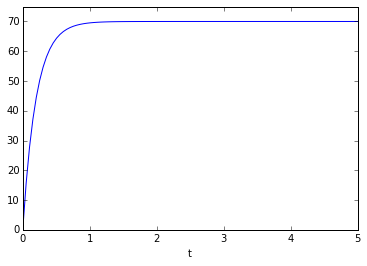

In [7]:
def pltshow(kP, kI):
    c = 1
    m = 1
    gamma = 1

    Gtr = tf(c/m,[1,gamma])
    C = tf([kP,kI],[1,0])

    Gcl = feedback(C*Gtr,1,-1)

    x0 = 0
    t = np.linspace(0,5,100)
    r = 70*np.ones(t.shape)

    [y,tout,x] = lsim(Gcl,r,t,x0)

    plt.plot(tout, y)
    plt.xlabel('t')
    plt.ylim(0,75)

    plt.show()

interact(pltshow, kP=(1.0,9.0), kI=(1.0,9.0))
plt.show()

---
# 2. Root Locus
- The Root Locus Method by Brian Douglas

- from [umich control](http://ctms.engin.umich.edu/CTMS/index.php?example=Introduction&section=ControlRootLocus)


In [8]:
%%html
<iframe src="https://www.youtube.com/embed/CRvVDoQJjYI?list=PLUMWjy5jgHK1NC52DXXrriwihVrYZKqjk" 
width="560" height="315" frameborder="0" allowfullscreen></iframe>

<img src = "./image_files/RootLocusTutorial_ClosedLoopPoles_BlockDiagram.png" , width = 500>

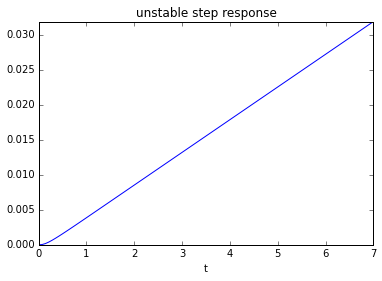

In [9]:
sys = tf([1,7],[1,0])*tf(1,[1,5])*tf(1,[1,15])*tf(1,[1,20])

[y, tout] = step(sys)

plt.plot(tout, y)
plt.xlabel('t')
plt.axis('tight')
plt.title('unstable step response')

plt.show()

In [10]:
print(pole(sys))

[-20. -15.  -5.   0.]


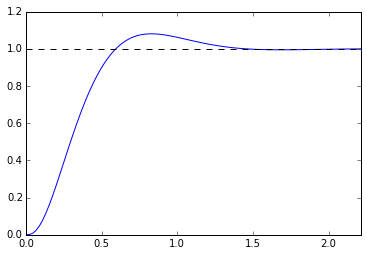

In [11]:
G = sys

def pltshow(k):
    global G

    Gcl = feedback(k*G,1,-1)

    [y,tout] = step(Gcl)

    plt.plot(tout,y)
    plt.plot(tout,np.ones(tout.shape),'k--')
    plt.axis('tight')
    plt.ylim(0.0,1.2)

    plt.show()
    
interact(pltshow, k=(1,1600))
plt.show()

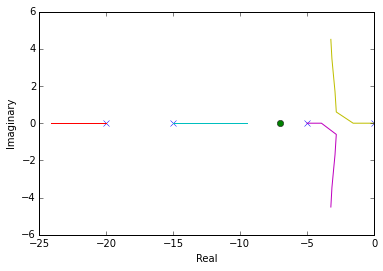

In [12]:
rlocus(G)
plt.show()

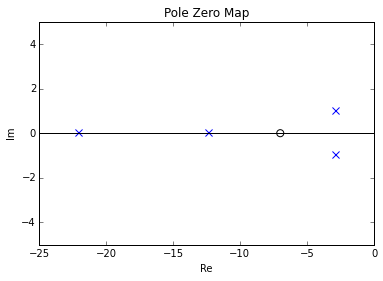


             350 s + 2450
--------------------------------------
s^4 + 40 s^3 + 475 s^2 + 1850 s + 2450



In [33]:
def pltshow(k):
    global sys
    sys_cl = feedback(k*sys,1,-1) #negative feedback

    pzmap.pzmap(sys_cl)
    plt.axis([-25,0,-5,5])
    plt.show()
    
    print(sys_cl)
    
interact(pltshow, k=(1,700))
plt.show()

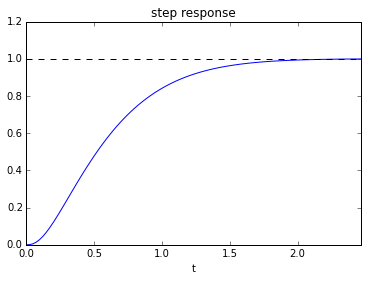


             350 s + 2450
--------------------------------------
s^4 + 40 s^3 + 475 s^2 + 1850 s + 2450



In [14]:
def pltshow(k):
    global sys
    sys_cl = feedback(k*sys,1,-1) #negative feedback

    [y,tout] = step(sys_cl)
    
    plt.plot(tout,y)
    plt.plot(tout,np.ones(tout.shape),'k--')
    plt.axis('tight')
    plt.ylim(0,1.2)
    plt.xlabel('t')
    plt.title('step response')
    
    plt.show()
    
    print(sys_cl)
    
interact(pltshow, k=(1,700))
plt.show()

# 3. State Space Representation

- from 3.1 A Simple Robot | Control of Mobile Robots

- from 3.2 State Space Models | Control of Mobile Robots

In [15]:
%%html
<iframe src="https://www.youtube.com/embed/kQNUpNh6nBc?list=PLp8ijpvp8iCvFDYdcXqqYU5Ibl_aOqwjr" 
width="560" height="315" frameborder="0" allowfullscreen></iframe>

In [16]:
%%html
<iframe src="https://www.youtube.com/embed/W6AUOyj5bFA?list=PLp8ijpvp8iCvFDYdcXqqYU5Ibl_aOqwjr" 
width="560" height="315" frameborder="0" allowfullscreen></iframe>

__Controlling a point mass__

Given a point mass on a line whose acceleration is directly controlled:

$$ \ddot{p} = u $$

want to write this on a compact/general form

$$
\begin{align*}
\dot{x}_1 &= x_2\\
\dot{x}_2 &= u\\
\end{align*}
$$

on a state space form

$$
\begin{align*}
\dot{x} &= 
\left[ {\begin{matrix}
   \dot{x}_1 \\
   \dot{x}_2 \\   
  \end{matrix} } \right] =
\left[ {\begin{matrix}
   0 & 1 \\
   0 & 0 \\   
  \end{matrix} } \right]
\left[ {\begin{array}{cc}
   x_1 \\
   x_2 \\   
\end{array} } \right] +
\left[ {\begin{array}{cc}
   0 \\
   1 \\   
\end{array} } \right]u\\
\\y & = p=x_1=
\left[ {\begin{matrix}
   1 & 0    
\end{matrix} } \right]  
\left[ {\begin{array}{cc}
   x_1 \\
   x_2 \\   
\end{array} } \right]  
\end{align*}
$$

<img src="./image_files/ss_diag.png" width=400/>

## 3.1. The car model

If we care about/can measure the velocity:

$$ A = -\gamma, \qquad B = \frac{c}{m}, \qquad C = 1    $$

If we care about/can measure the position we have the same general equation with different matrices:


$$
A = 
\left[ {\begin{matrix}
   0 & 1 \\
   0 & -\gamma \\   
\end{matrix} } \right], \qquad
B = 
\left[ {\begin{matrix}
   0 \\
   \frac{c}{m} \\   
\end{matrix} } \right], \qquad
C = \left[ {\begin{matrix}
   1 \quad 0 \\     
\end{matrix} } \right]
$$

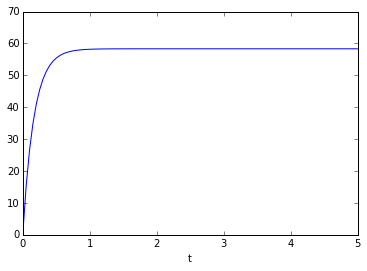

In [17]:
def pltshow(k):

    #system in ss
    c = 1
    m = 1
    gamma = 1

    A = -gamma
    B = c/m
    C = 1
    D = 0

    Gss = ss(A,B,C,D)

    # P controller
    C = k

    # close loop
    Gcl = feedback(C*Gss,1,-1)

    x0 = 0
    t = np.linspace(0,5,100)
    r = 70*np.ones(t.shape)

    [y,tout,x] = lsim(Gcl,r,t,x0)

    plt.plot(tout,y)
    plt.xlabel('t')
    plt.ylim(0,70)

    plt.show()

interact(pltshow, k=(1.0, 9.0))
plt.show()

## 3.2. Back to the World's Simplest Robot (Output Feedback)

- from 3.7 Output Feedback | Control of Mobile Robots

In [18]:
%%html
<iframe src="https://www.youtube.com/embed/HmqOnsRH73w?list=PLp8ijpvp8iCvFDYdcXqqYU5Ibl_aOqwjr" 
width="560" height="315" frameborder="0" allowfullscreen></iframe>

$$u = -y$$

<img src="./image_files/outputfeedback.png" width=400/>

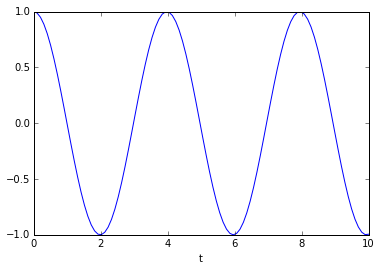

In [19]:
def pltshow(K):
    # to move towards the origin
    # u = - y

    A = np.array([[0, 1],[0,0]])
    B = np.array([[0],[1]])
    C = [1,0]
    D = 0

    G = ss(A,B,C,D)

    x0 = np.array([[1,0]]).T
    t = np.linspace(0,10,100)
    r = np.zeros(t.shape)

    Gcl = feedback(G,K,-1)

    [y,tout,x] = lsim(Gcl,r,t,x0)

    plt.plot(tout,y)
    plt.xlabel('t')

    plt.show()

interact(pltshow, K=(0.1,4.9,0.1))
plt.show()

# 4. State Feedback

- from 3.8 State Feedback | Control of Mobile Robots

In [20]:
%%html
<iframe src="https://www.youtube.com/embed/yl5IiJOYQps?list=PLciAw3uhNCiD3dkLTPJgHoMnsu8XgCt1m" 
width="560" height="315" frameborder="0" allowfullscreen></iframe>

<img src="image_files/statefeedback.gif" width=400/>

To move forwards origin, $R = 0$

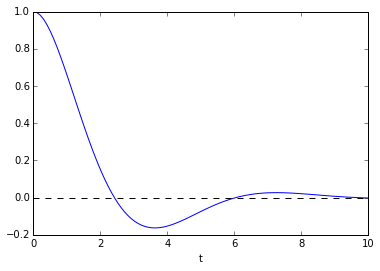

In [21]:
Gcl = ss(0,0,0,0)

def pltshow(k1, k2):
    global Gcl
    
    A = np.array([[0,1],[0,0]])
    B = np.array([[0],[1]])
    C = [1,0]
    D = 0

    G = ss(A,B,C,D)

    K = [k1,k2]
    Gcl = ss(A-B*K,B,C,D)

    x0 = np.array([[1,0]]).T
    t = np.linspace(0,10,100);
    r = np.zeros(t.shape)

    [y,tout,x] = lsim(Gcl,r,t,x0)

    plt.plot(tout,y)
    plt.plot(tout,np.zeros(tout.shape),'k--')
    plt.xlabel('t')

    plt.show()
    
interact(pltshow, k1=(0.1,2.0,0.1), k2=(0.1,2.0,0.1))
plt.show()

In [22]:
print(np.linalg.eigvals(Gcl.A))

[-0.5+0.8660254j -0.5-0.8660254j]


Eigenvalues Matter 
- It is clear that some eigenvalues are better than others. Some cause oscillations, some make the system respond too slowly,
and so forth ...
- In the next module we will see how to select eigenvalues and how to pick control laws based on the output rather than the state.

## 4.1. Pole Placement
- from 4.1 Stabilizing the Point Mass | Control of Mobile Robots

- from 4.2 Pole Placement | Control of Mobile Robots

In [23]:
%%html
<iframe src="https://www.youtube.com/embed/S4WZTmEnbrY?list=PLp8ijpvp8iCvFDYdcXqqYU5Ibl_aOqwjr" 
width="560" height="315" frameborder="0" allowfullscreen></iframe>

In [24]:
%%html
<iframe src="https://www.youtube.com/embed/5tWhOK8Klo0?list=PLp8ijpvp8iCvFDYdcXqqYU5Ibl_aOqwjr" 
width="560" height="315" frameborder="0" allowfullscreen></iframe>

back to the point-mass, again
 
 $$ u = -Kx \rightarrow \dot{x}=(A-BK)x $$
 
 $$
\begin{align*}
A-BK = 
\left[ {\begin{matrix}
   0 & 1 \\
   0 & 0 \\   
  \end{matrix} } \right]-
\left[ {\begin{array}{cc}
   0 \\
   1 \\   
\end{array} } \right]
\left[ {\begin{array}{cc}
   k_1 \,\, k_2   
\end{array} } \right]&=
\left[ {\begin{matrix}
   0 & 1 \\
   -k_1 & -k_2 \\   
\end{matrix} } \right]
\end{align*}
$$

$$
\left| {
\begin{matrix}
   0 & 1 \\
   -k_1 & -k_2 \\   
\end{matrix} } \right|=
\lambda^2 + \lambda k_2 + k_1
$$

Desired Eigenvalues: let's pick both eigenvalues at -1

$$ (\lambda+1)(\lambda+1) = \lambda^2 + 2 \lambda + 1 $$

$$k_1 = 2, k_2 = 1 $$

<img src="./image_files/state_feedback_ukx.png" width=350/>

Pick the control gains such that the eigenvalues (poles) of the closed loop system match the desired eigenvalues

Questions
- Is this always possible? (No)
- How should we pick the eigenvalues? (Mix of art and science)

$$
\begin{align*}
\dot{x} &= 
\left[ {\begin{matrix}
   2 & 0 \\
   1 & 1 \\   
  \end{matrix} } \right]
\left[ {\begin{array}{cc}
   x_1 \\
   x_2 \\   
\end{array} } \right] +
\left[ {\begin{array}{cc}
   1 \\
   1 \\   
\end{array} } \right]u  
\end{align*}
$$

$$
\begin{align*}
A-BK = 
\left[ {\begin{matrix}
   2-k_1 & -k_2 \\
   1-k_1 & 1-k_2 \\   
\end{matrix} } \right]
\end{align*}
$$

$$ \varphi = \lambda^2 + \lambda (-3 + k_1 + k_2) + 2 - k_1 - k_2$$

Suppose 
$$ \varphi = (\lambda+1)^2 = \lambda^2 + \lambda (-3 + k_1 + k_2) + 2 - k_1 - k_2$$

Let's pick both eigenvalues at -1

$$-3 + k_1 + k_2 = 2 \quad \text{and} \quad 2 - k_1 - k_2 = 1$$

$\rightarrow$ no $k_1$ and $k_2$ exist

What's at play here is a lack of ``controllability``, i.e., the effect of the input is not sufficiently rich to influence the system enough

In [25]:
A = np.array([[2,0],[1,-1]])
B = np.array([[1],[1]])
C = [1,0]

P = np.array([[-0.5+1j,0.5-1j]])
# P = [-0.1 + 1j, -0.1 - 1j];
# P = [-0.5, -1];
# P = [-5, -4];

#K = place(A,B,P)
# place command is not available yet

In [26]:
K = [2.6260,-0.6250]

$$ \dot{x} = Ax + Bu = Ax-BKx = (A-BK)x $$

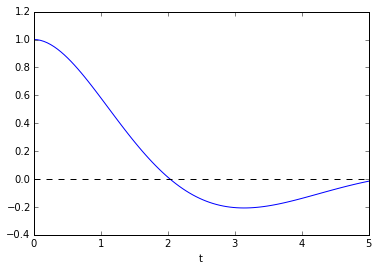

In [27]:
x0 = np.array([[1],[1]])
Gcl = ss(A-B*K,B,C,0)

t = np.linspace(0,5,100)
u = np.zeros(t.shape)

[y,tout,x] = lsim(Gcl,u,t,x0)

plt.plot(tout,y)
plt.xlabel('t')
plt.plot(tout,np.zeros(tout.shape),'k--')

plt.show()

## 4.2. Controllability

- When can we place the eigenvalues using state feedback?

- When is B matrix (the actuator configuration) rich enough so that we can make the system do whatever we want it to do?

- The answer revolves around the concept of ``controllability``

Given a discrete-time system

$$x_{k+1} = Ax_k + Bu_k$$

We would like to drive this system in $n$ steps to a particular target state $x^{*}$ 

$$
\begin{align*}
x_1 &= Ax_0 + Bu_0 = Bu_0\\
x_2 &= Ax_1 + Bu_1 = ABu_0 + Bu_1\\
x_3 &= Ax_2 + Bu_2 = A^2Bu_0 + ABu_1 + Bu_2\\
&\vdots\\
x_n &= A^{n-1}Bu_0 + \cdots + Bu_{n-1}\\
\end{align*}
$$

We want to solve

$$
\begin{align*}
x^{*} &= 
\left[ {\begin{matrix}
   B & AB & \cdots & A^{n-1}B\\   
  \end{matrix} } \right]
\left[ {\begin{array}{cc}
   u_{n-1} \\
   \vdots \\   
   u_1\\
   u_0
\end{array} } \right] 
\end{align*}
$$

This is possible for any target state if and only if 
$$
\text{rank}\left(\left[ {\begin{matrix}
   B & AB & \cdots & A^{n-1}B\\   
  \end{matrix} } \right]\right) = n
$$

__Example 1__

$$
\begin{align}
\dot{x} &= 
\left[ {\begin{matrix}
   2 & 0 \\
   1 & 1 \\   
  \end{matrix} } \right]
\left[ {\begin{array}{cc}
   x_1 \\
   x_2 \\   
\end{array} } \right] +
\left[ {\begin{array}{cc}
   1 \\
   1 \\   
\end{array} } \right]u  
\end{align}
$$

In [28]:
A = np.array([[2,0],[1,1]])
B = np.array([[1],[1]])     

G = ctrb(A,B)
print(G)

[[1 2]
 [1 2]]


In [29]:
print(np.linalg.matrix_rank(G))

1


__Example 2__

$$
\begin{align}
\dot{x} &= 
\left[ {\begin{matrix}
   0 & 1 \\
   0 & 0 \\   
  \end{matrix} } \right]
\left[ {\begin{array}{cc}
   x_1 \\
   x_2 \\   
\end{array} } \right] +
\left[ {\begin{array}{cc}
   0 \\
   1 \\   
\end{array} } \right]u  
\end{align}
$$

In [30]:
A = np.array([[0,1],[0,0]])
B = np.array([[0],[1]])     

G = ctrb(A,B)
print(G)

[[0 1]
 [1 0]]


In [31]:
print(np.linalg.matrix_rank(G))

2


In [32]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>